In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tpot import TPOTClassifier

**Exploring the data**

In [ ]:
# Read the data
df = pd.read_csv('../input/diabetes-data-set/diabetes.csv')

In [ ]:
# Load the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and columns of the data
df.shape # 768 rows and 9 columns

(768, 9)

In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


data is numric

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- the min value in  5 columns = 0 (Glucose, BloodPressure, Skin Thickness, Insulin, BMI) which will be considered as null values<br>
- In skin Thickness and Insulin Column less than or equal 25% of the data are null values
- look at the maximum Insulin Value = 846 wich is too high u will never find a person with this insulin value (outlier)<br>
all this an errors in data collection

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Data PreProcessing**

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

convert those 0's values in these 5 columns to determine how many missing values in each feature in our data

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

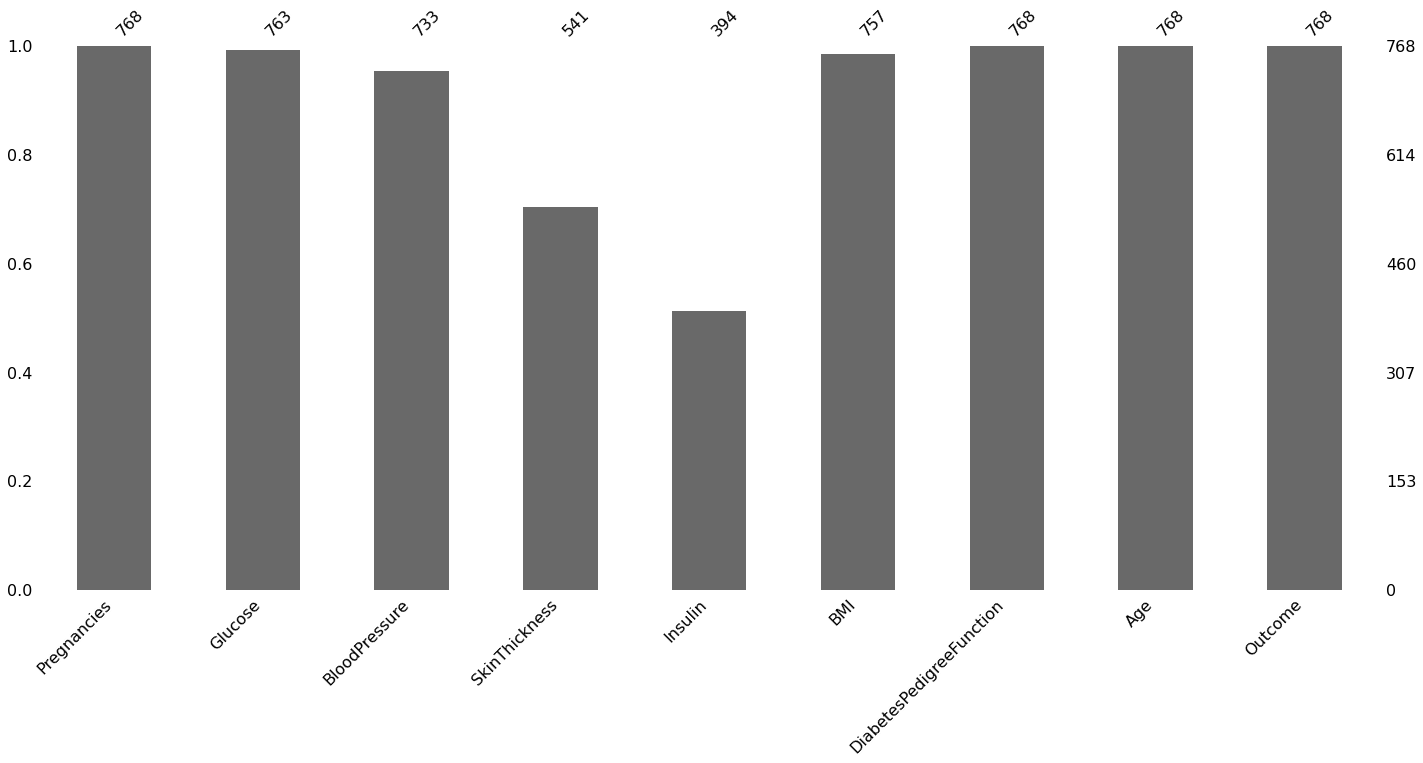

In [ ]:
# using missingno library to visualize the data with neglecting the missing values
msno.bar(df);

In [ ]:
df[df.Glucose.notnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
df[['Glucose', 'Outcome']].groupby(['Outcome'])[['Glucose']].median().reset_index()

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [ ]:
# The missing values will be filled with the median values of each variable.
def median_target(var):
    temp = df[df[var].notnull()] # Assign the not NAN values of specific column to the variable temp
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index() # groupby outcome and calculate the median for each outcome
    return temp

In [ ]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [ ]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [ ]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [ ]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for col in columns:

    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**detect outliers with IQR score rule**


a brief description: <br>
IQR score The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Q1 is = 25% percintile value of the data<br>
Q3 is = 75% Percintile value of the data<br>
IQR = Q3 - Q1

In [ ]:
# example for more understanding the rule
Q1 = df["Glucose"].quantile(0.25)
Q3 = df["Glucose"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}\nlower = {lower}\nupper = {upper}")
print(f"\n\nConclusion: Any value not in this range (lower and upper) = {lower, upper} can be removed as an outlier")

Q1 = 99.75
Q3 = 140.25
IQR = 40.5
lower = 39.0
upper = 201.0


Conclusion: Any value not in this range (lower and upper) = (39.0, 201.0) can be removed as an outlier


In [ ]:
#looping on all the features to see which feature has an outliers
#but with this rule we will take Q1 = 5% and Q3 = 95%
for feature in df:
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None) and df[(df[feature] < lower)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


So we have no outliers to remove

In [ ]:
df2 = df.copy()
df2.Outcome = df2.Outcome.apply(lambda x:'Healthy' if x == 0 else 'Sick')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,Sick
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,Healthy
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,Sick
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Healthy
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Sick


In [ ]:
df2.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                47
SkinThickness                50
Insulin                     187
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
df2.Outcome.value_counts()

Healthy    500
Sick       268
Name: Outcome, dtype: int64

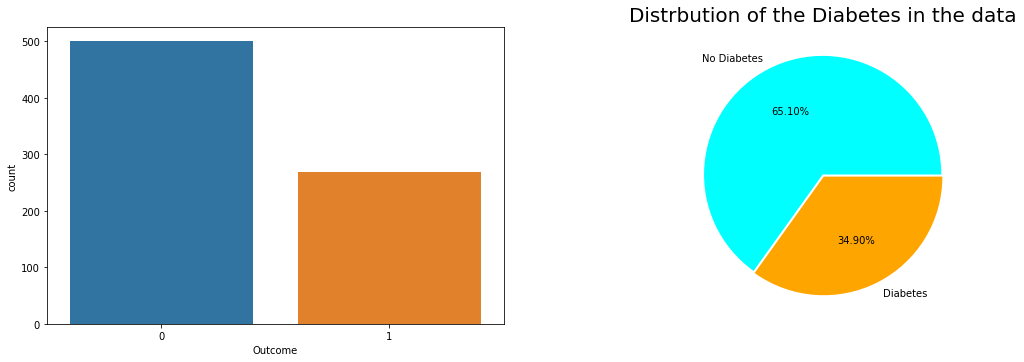

In [ ]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='Outcome', data=df)

plt.subplot(2,2,2)
no_dib = df[df.Outcome == 0].count()[0]
dib = df[df.Outcome == 1].count()[0]
plt.title('Distrbution of the Diabetes in the data', {'fontsize' : 20})
plt.pie([no_dib, dib], labels=['No Diabetes', 'Diabetes'], autopct="%.2f%%", explode=[0.01,0.01], colors=['cyan', 'orange'])
plt.show()

We have 65% healthy pepole and 35% Sick pepole in the data

In [ ]:
df2.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

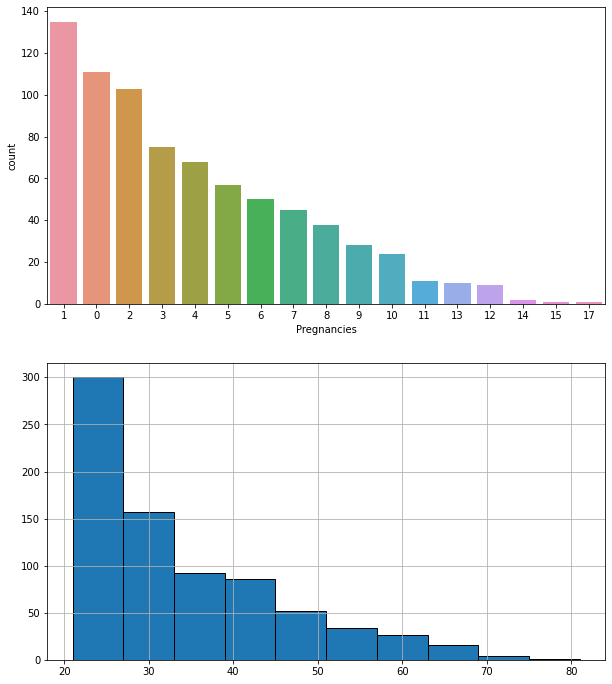

In [ ]:
plt.figure(figsize=(22,12))
order = df2.groupby('Pregnancies').count().sort_values(by='Outcome', ascending=False).index
plt.subplot(2,2,1)
sns.countplot(x='Pregnancies', data=df2, order=order);

plt.subplot(2,2,3)
df["Age"].hist(edgecolor = "black");

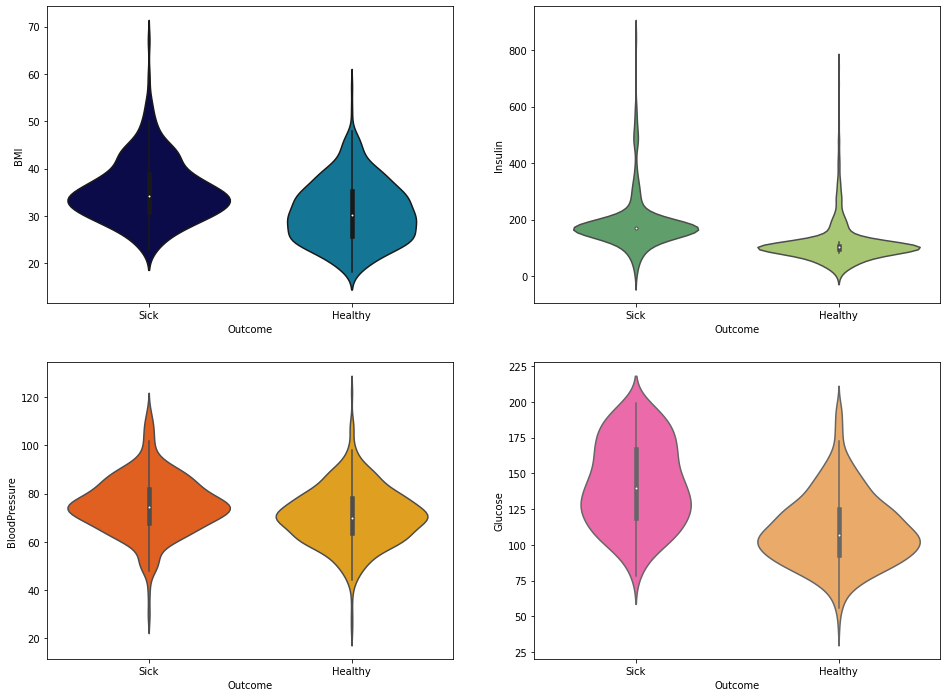

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.violinplot(x='Outcome', y='BMI', data=df2, palette='ocean')

plt.subplot(2,2,2)
sns.violinplot(x='Outcome', y='Insulin', data=df2, palette='summer')

plt.subplot(2,2,3)
sns.violinplot(x='Outcome', y='BloodPressure', data=df2, palette='autumn')

plt.subplot(2,2,4)
sns.violinplot(x='Outcome', y='Glucose', data=df2, palette='spring');

It seems that when these features are increasingly increasingly an opportunity for diabetes

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

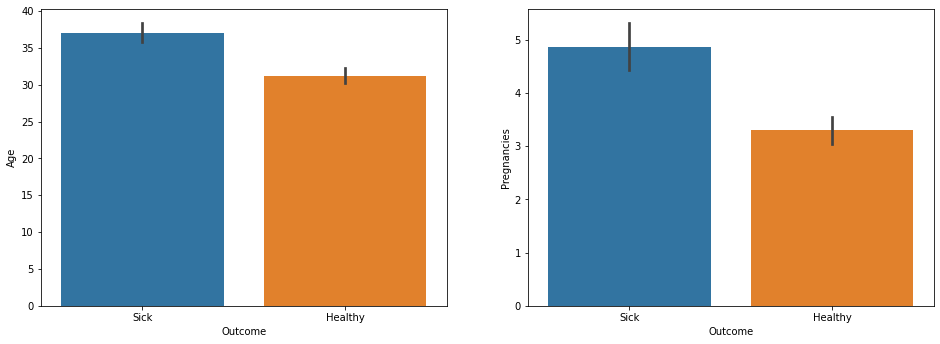

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.barplot(x='Outcome', y='Age', data=df2)

plt.subplot(2,2,2)
sns.barplot(x='Outcome', y='Pregnancies', data=df2)

In [ ]:
# According to BMI, some ranges were determined and categorical variables were assigned.

NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

df2["NewBMI"] = NewBMI

df2.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

df2.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df2.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df2.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df2.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df2.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,Sick,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,Healthy,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,Sick,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Healthy,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Sick,Obesity 3


In [ ]:
df2.NewBMI.value_counts()

Obesity 1      235
Overweight     179
Obesity 2      150
Normal         102
Obesity 3       98
Underweight      4
Name: NewBMI, dtype: int64

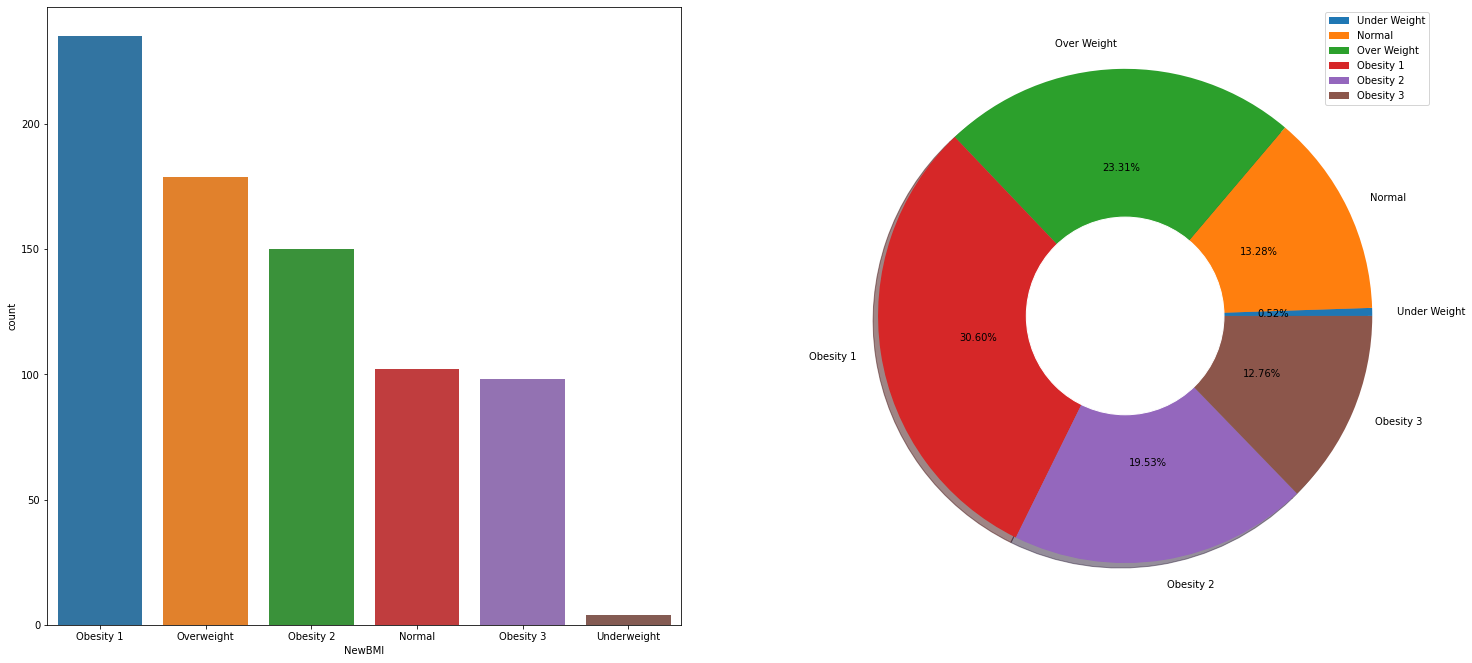

In [ ]:
plt.figure(figsize=(25,25))

plt.subplot(2,2,1)
order = df2.groupby('NewBMI').count().sort_values(by='Outcome', ascending=False).index
sns.countplot(x='NewBMI', data=df2, order=order)

plt.subplot(2,2,2)
Under_wei = df2.NewBMI[df2.NewBMI == 'Underweight'].count()
normal = df2.NewBMI[df2.NewBMI == 'Normal'].count()
over_weight = df2.NewBMI[df2.NewBMI == 'Overweight'].count()
obesity_1 = df2.NewBMI[df2.NewBMI == 'Obesity 1'].count()
obesity_2 = df2.NewBMI[df2.NewBMI == 'Obesity 2'].count()
obesity_3 = df2.NewBMI[df2.NewBMI == 'Obesity 3'].count()
weights = [Under_wei, normal, over_weight, obesity_1, obesity_2, obesity_3]
labels = ['Under Weight', 'Normal', 'Over Weight', 'Obesity 1', 'Obesity 2', 'Obesity 3']
plt.pie(weights, labels=labels, autopct="%.2f%%", shadow=True);
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()
plt.show()

Obesity 1 has the majority in the data which the BMI between 29.9 and 34.9

<AxesSubplot:xlabel='NewBMI', ylabel='count'>

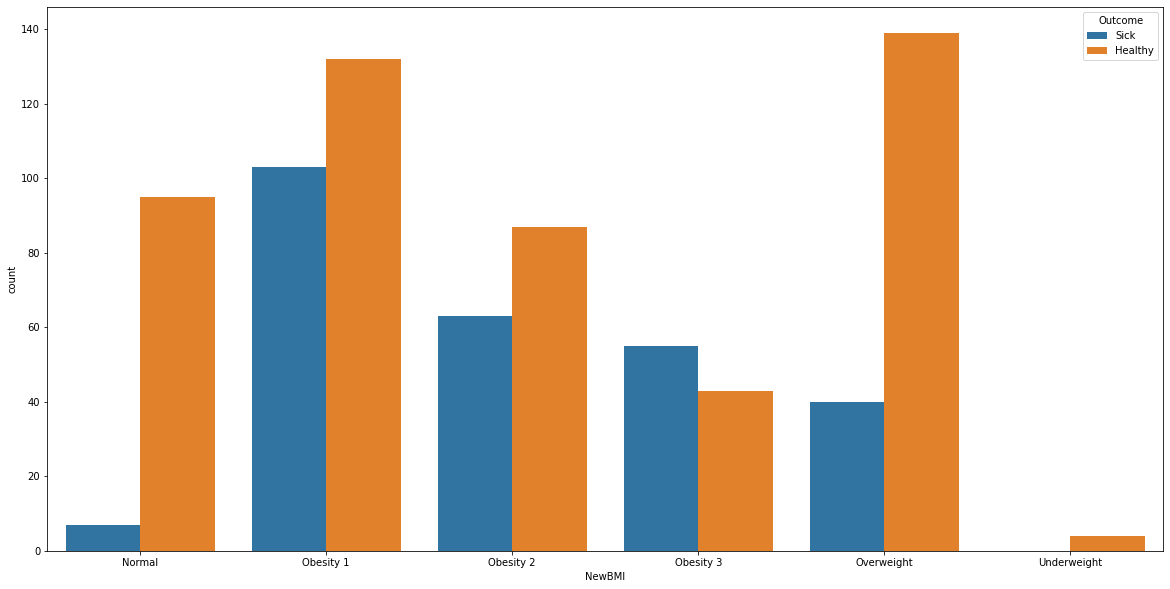

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='NewBMI', hue='Outcome', data=df2)

all the Underweights is healthy (BMI less than 18.5)<br>
Normal Weights are healthy except limited number which are sick<br>
it seems that when the weight increase so you are more likely to have diabetes

In [ ]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
df2["NewInsulinScore"] = df2.apply(set_insulin, axis=1)

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,Sick,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,Healthy,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,Sick,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Healthy,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Sick,Obesity 3,Abnormal


In [ ]:
df2.NewInsulinScore.value_counts()

Normal      496
Abnormal    272
Name: NewInsulinScore, dtype: int64

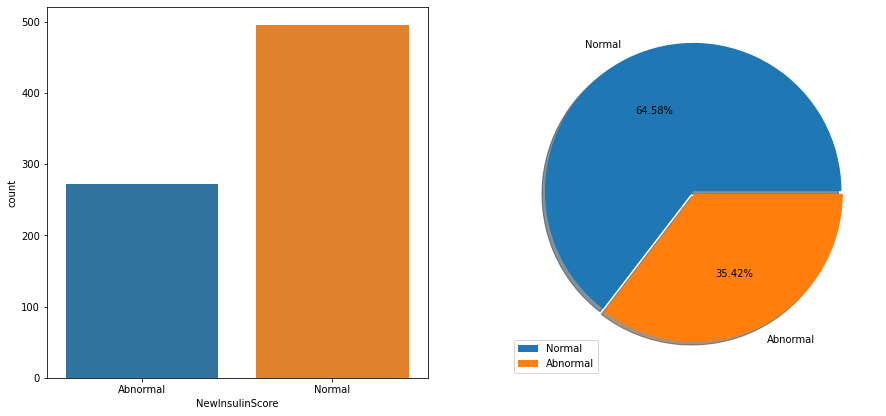

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x='NewInsulinScore', data=df2);

plt.subplot(2,2,2)
normal = df2.NewInsulinScore[df2.NewInsulinScore == 'Normal'].count()
abnormal = df2.NewInsulinScore[df2.NewInsulinScore == 'Abnormal'].count()
plt.pie([normal, abnormal], labels=['Normal', 'Abnormal'], autopct='%.2f%%', explode = [0.01,0.01], shadow=True)
plt.legend()
plt.show()

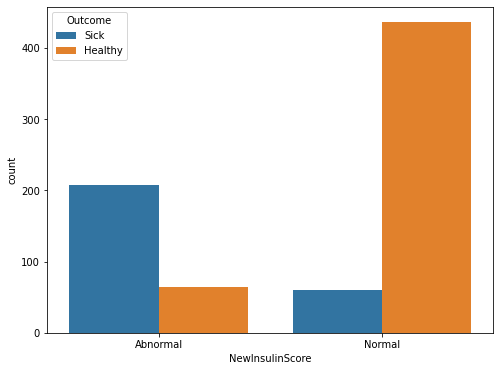

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='NewInsulinScore', hue='Outcome', data=df2);

In [ ]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df2["NewGlucose"] = NewGlucose
df2.loc[df2["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df2.loc[(df2["Glucose"] > 70) & (df2["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df2.loc[(df2["Glucose"] > 99) & (df2["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df2.loc[df2["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df2.NewGlucose.value_counts()

Secret        290
Overweight    286
Normal        181
Low            11
High            0
Name: NewGlucose, dtype: int64

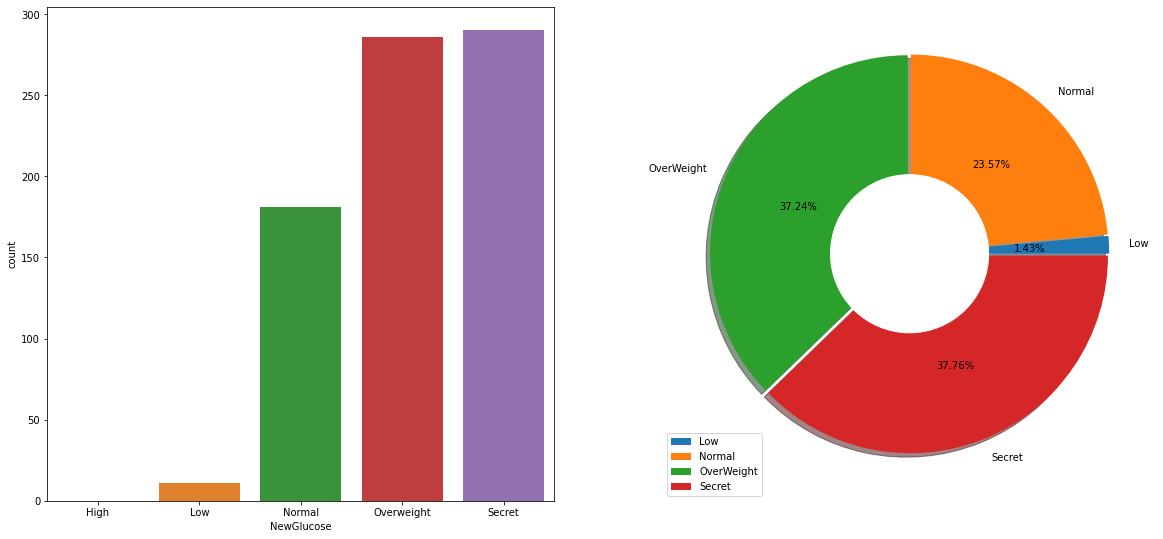

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.countplot(x='NewGlucose', data=df2);

plt.subplot(2,2,2)
low = df2.NewGlucose[df2.NewGlucose == 'Low'].count()
normal = df2.NewGlucose[df2.NewGlucose == 'Normal'].count()
over_wei = df2.NewGlucose[df2.NewGlucose == 'Overweight'].count()
secret = df2.NewGlucose[df2.NewGlucose == 'Secret'].count()
weight = [low, normal, over_wei, secret]
labels = ['Low', 'Normal', 'OverWeight', 'Secret']
plt.pie(weight, labels=labels, autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01,0.01]);
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()
plt.show()

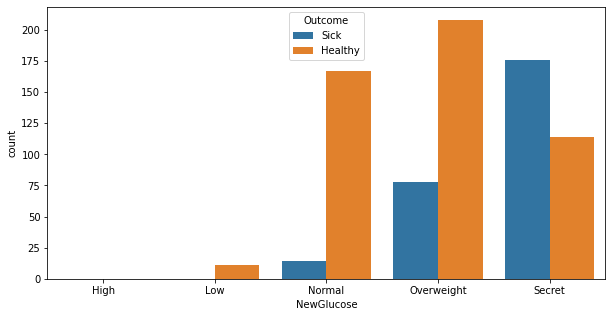

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='NewGlucose', hue='Outcome', data=df2);

When the Glucose is Secret then you are more likely to have diabetes

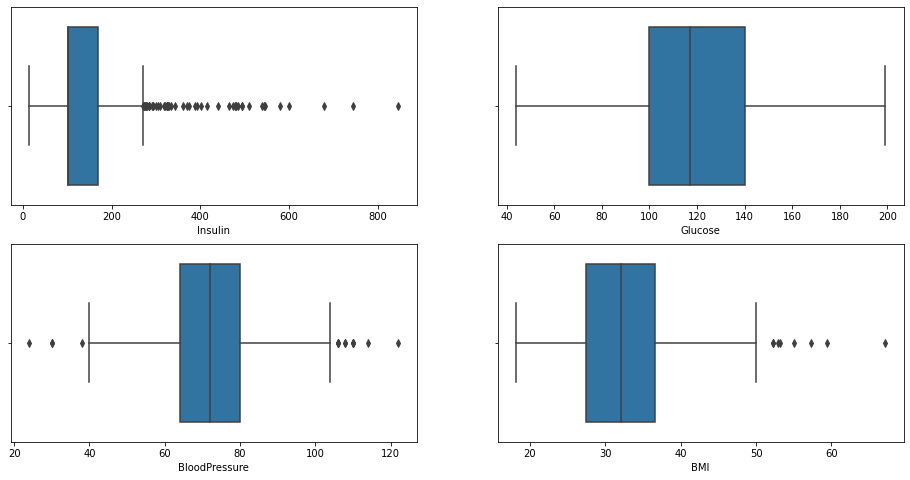

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(x='Insulin', data=df)

plt.subplot(2,2,2)
sns.boxplot(x='Glucose', data=df)

plt.subplot(2,2,3)
sns.boxplot(x='BloodPressure', data=df)

plt.subplot(2,2,4)
sns.boxplot(x='BMI', data=df);